<a href="https://colab.research.google.com/github/mohamedSalehMatar/PRODIGY_ML_1/blob/main/PRODIGY_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [210]:
datatest= pd.read_csv('/content/gdrive/MyDrive/InfoTech/TasksDone/Task1/test.csv')

In [211]:
datatrain= pd.read_csv('/content/gdrive/MyDrive/InfoTech/TasksDone/Task1/train.csv')

In [212]:
datatrain.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [213]:
# Select the desired columns from the DataFrame
datatrain = datatrain[['LotFrontage', 'LotArea', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']]

In [214]:
datatrain.duplicated().sum()

1

In [215]:
#data null-value amout
datatrain.isnull().sum()

LotFrontage     259
LotArea           0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
SalePrice         0
dtype: int64

In [216]:
numerical_features = datatrain.select_dtypes(include=['float', 'int']).columns

for feature in numerical_features:
    #print(f'info of {feature} = ',datatrain[feature].describe())
    Q1 = np.percentile(datatrain[feature], 25, method='midpoint')
    Q3 = np.percentile(datatrain[feature], 75, method='midpoint')
    IQR = Q3 - Q1
    #print(f'\nIQR of {feature} = ', IQR)

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    #print(f'Lower bound of {feature} = ', lower)
    #print(f'Upper bound of {feature} = ', upper)

    # Replace the outliers with the feature mean
    datatrain.loc[(datatrain[feature] < lower) | (datatrain[feature] > upper), feature] = None

    # print(f'\nOutliers of {feature} is no more.')

In [217]:
datatrain.isnull().sum()

LotFrontage     259
LotArea          68
GrLivArea        31
BsmtFullBath      1
BsmtHalfBath     82
FullBath          0
HalfBath          0
BedroomAbvGr     35
TotRmsAbvGrd     30
SalePrice        61
dtype: int64

In [218]:
# Identify numerical columns
numerical_columns = datatrain.select_dtypes(['int', 'float']).columns

for column in numerical_columns:
    mean_value = datatrain[column].mean()  # Calculate the mean value
    datatrain[column].fillna(mean_value, inplace=True)  # Fill null values with the mean

# Verify the filled DataFrame
print(datatrain.isnull().sum())

LotFrontage     0
LotArea         0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


<ipython-input-218-6c9c222cd104>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatrain[column].fillna(mean_value, inplace=True)  # Fill null values with the mean


In [219]:
datatrain.head(5)

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,65.0,8450.0,1710.0,1.0,0.0,2.0,1.0,3.0,8.0,208500.0
1,80.0,9600.0,1262.0,0.0,0.0,2.0,0.0,3.0,6.0,181500.0
2,68.0,11250.0,1786.0,1.0,0.0,2.0,1.0,3.0,6.0,223500.0
3,60.0,9550.0,1717.0,1.0,0.0,1.0,0.0,3.0,7.0,140000.0
4,84.0,14260.0,2198.0,1.0,0.0,2.0,1.0,4.0,9.0,250000.0


In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datatrain_scaled = scaler.fit_transform(datatrain)

# Convert the transformed data back to a DataFrame
datatrain = pd.DataFrame(datatrain_scaled, columns=datatrain.columns)

In [221]:
datatrain.head(5)

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,0.150685,0.430592,0.574290,0.5,0.0,0.666667,0.5,0.666667,0.750,0.568994
1,0.202055,0.501606,0.387312,0.0,0.0,0.666667,0.0,0.666667,0.500,0.480498
2,0.160959,0.603495,0.606010,0.5,0.0,0.666667,0.5,0.666667,0.500,0.618158
3,0.133562,0.498518,0.577212,0.5,0.0,0.333333,0.0,0.666667,0.625,0.344477
4,0.215753,0.789366,0.777963,0.5,0.0,0.666667,0.5,1.000000,0.875,0.705015


In [222]:
#features
X = datatrain.iloc[:,:-1].values

#label
y = datatrain.iloc[:, -1].values

Validation MSE: [0.01634892233018499, 0.01635347853547797, 0.016219943396822978, 0.016207193688571202, 0.016503279173015882], Train MSE: [0.015238286245808814, 0.013683581883716798, 0.016697272556099037, 0.01592975626088033, 0.014488735859922155]
Training Accuracy: 0.5561306007166901
Testing Accuracy: 0.4694933267063456


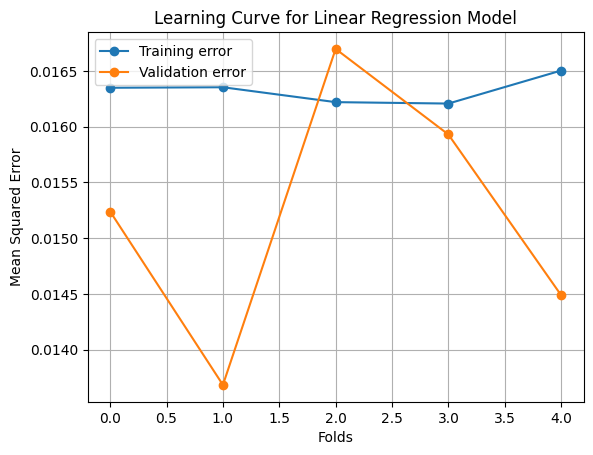

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression

train_errors, val_errors = [], []

# K-fold Cross-validation
# Split data into 20% Test and 80% Train
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

# Split 10% Validation, 10% Test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    lin = LinearRegression()
    lin.fit(X_train,y_train)

# Make predictions
    y_train_pred = lin.predict(X_train)
    y_val_pred = lin.predict(X_val)
    y_test_pred = lin.predict(X_test)

# Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

print(f'Validation MSE: {train_errors}, Train MSE: {val_errors}')

# Accuracy
print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# Graph
plt.plot(train_errors, marker='o', label='Training error')
plt.plot(val_errors, marker='o', label='Validation error')
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()